In [77]:

from datetime import datetime
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot') # use ggplot style
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt


In [60]:




df= pd.read_csv('/Users/Yimingliu/Downloads/seaice.csv')

# drop the 'Source Data' column as it obscures more useful columns and doesn't tell us much
df.drop('Source Data', axis = 1, inplace = True)

df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['Year'],x['Month'], x['Day']), "%Y %m %d"),axis=1)

In [70]:
north=df[df['hemisphere']=='north']
north.index=north['date'].values
south=df[df['hemisphere']=='south']
south.index=south['date'].values

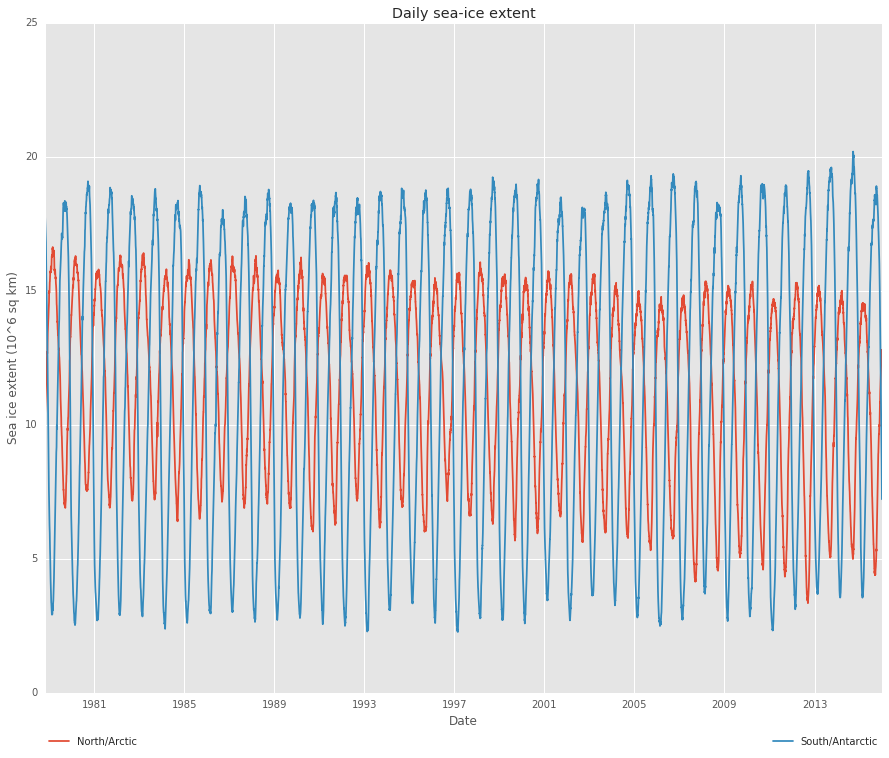

In [135]:

plt.figure(figsize=(15,12))
fig = plt.gcf()
plt.plot(north.index,north['Extent'], label='North/Arctic')
plt.plot(south.index,south['Extent'], label='South/Antarctic')
# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.162, 1., .102), loc=1, ncol=2, 
           mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Daily sea-ice extent');
fig.savefig('Daily_sea_ice.pdf')

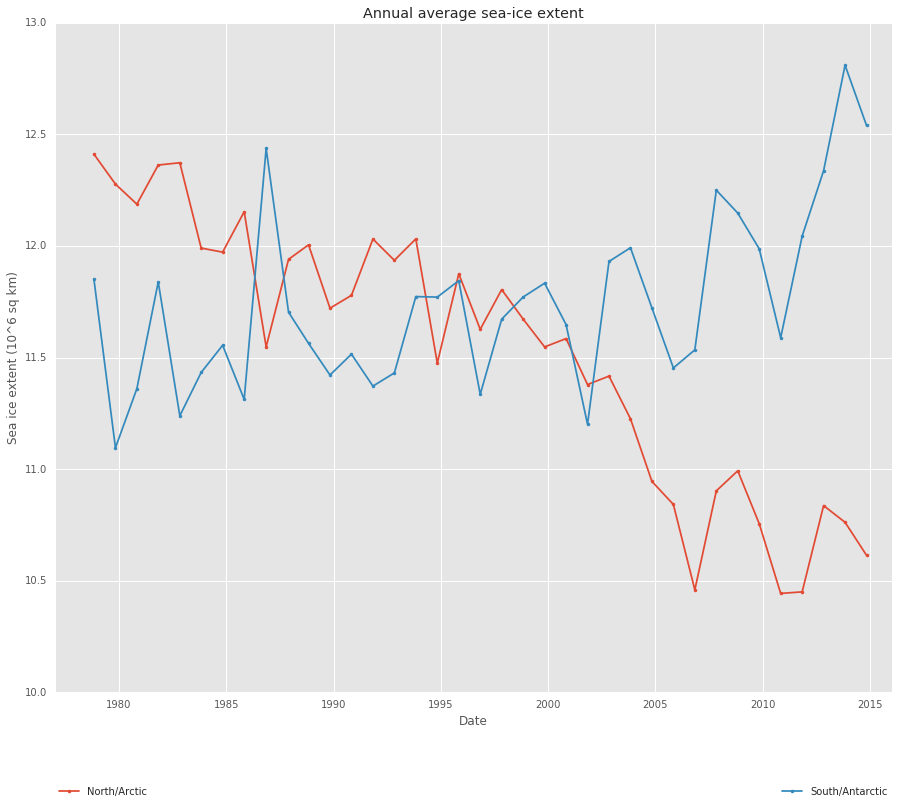

In [136]:
# resample raw data into annual averages
northyear = north.resample('12M').mean()
southyear = south.resample('12M').mean()

# remove the initial and final item as they are averaged incorrectly (also indexes seem bad)
northyear = northyear[1:-1]
southyear = southyear[1:-1]

plt.figure(figsize=(15,12))
fig=plt.gcf()
plt.plot(northyear.Year,northyear['Extent'], marker = '.', label='North/Arctic')
plt.plot(southyear.Year,southyear['Extent'], marker = '.', label='South/Antarctic')

# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.162, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Annual average sea-ice extent')
plt.xlim(1977, 2016)
plt.savefig('yearly_sea_ice.pdf')

In [74]:
# Obtain Monthly data
north_month, south_month = north.resample('1M').mean(), south.resample('1M').mean()

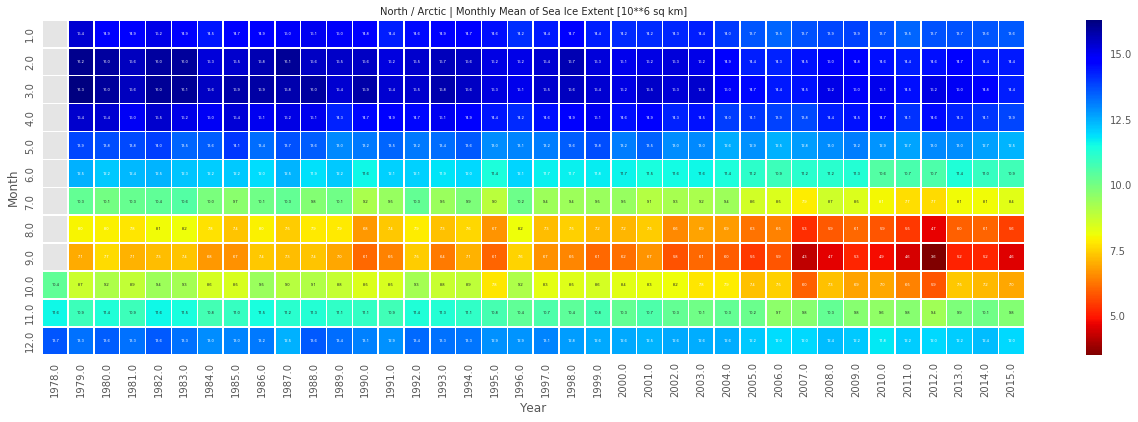

In [129]:
for monthly,Hem_name in zip([north_month],['North / Arctic']):
    plt.figure(figsize=(22,6))
    fig= plt.gcf()
    month_short = monthly.pivot("Month", "Year", "Extent")
    # plt.xticks(rotation=60)
    plt.title(Hem_name+' | Monthly Mean of Sea Ice Extent [10**6 sq km]',size=10)
    sns.heatmap(month_short, annot=True, fmt="1.1f", linewidths=.5,cmap='jet_r',annot_kws={"size":4})
    fig.savefig('North_Arctic.pdf')

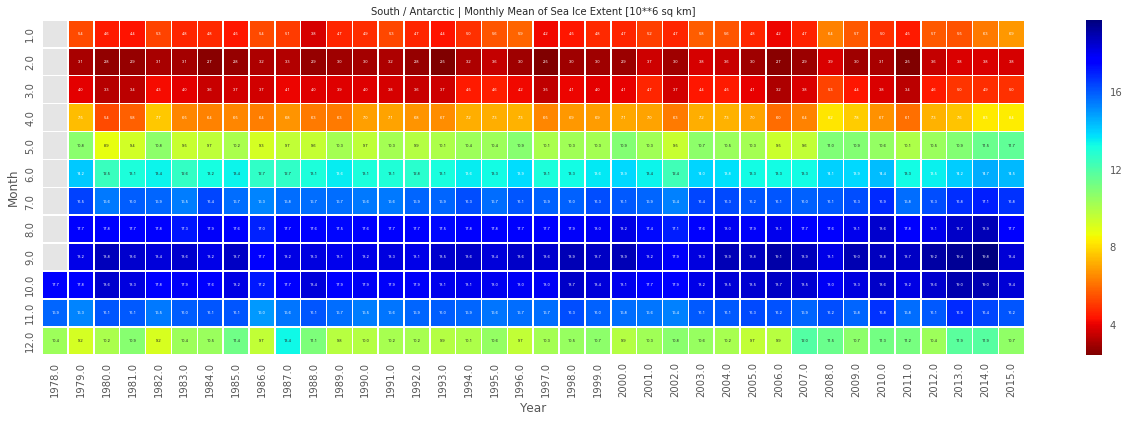

In [130]:
for monthly,Hem_name in zip([south_month],['South / Antarctic']):
    plt.figure(figsize=(22,6))
    fig=plt.gcf()
    month_short = monthly.pivot("Month", "Year", "Extent")
    # plt.xticks(rotation=60)
    plt.title(Hem_name+' | Monthly Mean of Sea Ice Extent [10**6 sq km]',size=10)
    sns.heatmap(month_short, annot=True, fmt="1.1f", linewidths=.5,cmap='jet_r',annot_kws={"size":4})
    fig.savefig('South_Antarctic.pdf')

In [80]:
from pandas.tools.plotting import autocorrelation_plot

In [83]:
s_n=north.ix[:,3]

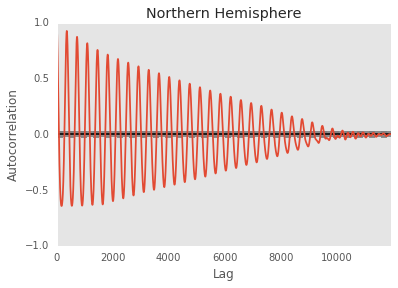

In [125]:
fig=plt.gcf()
autocorrelation_plot(s)
plt.title('Northern Hemisphere')
fig.savefig('auto_north.pdf')

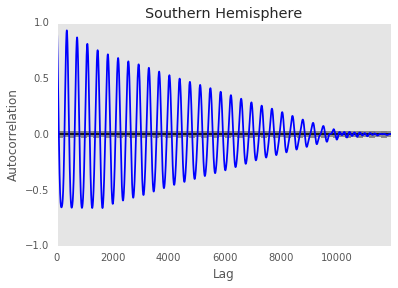

In [126]:

s_s=south.ix[:,3]
fig=plt.gcf()
autocorrelation_plot(s_s,c='blue')
plt.title('Southern Hemisphere')
fig.savefig('auto_south.pdf')

In [92]:
north.shape

(11930, 7)